In [6]:
# IMPORT STATEMENTS
import cv2
import re
import numpy as np
import matplotlib
from brokenaxes import brokenaxes 
matplotlib.use('pdf')
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from mpl_toolkits.axes_grid1 import SubplotDivider, Size
from mpl_toolkits.axes_grid1.mpl_axes import Axes
import matplotlib.patches as patches
import matplotlib.colors as colors
from matplotlib.transforms import *
import PIL
import math
#get_ipython().magic(u'matplotlib inline')
import pandas as pd
import seaborn as sns
import json
from sklearn.metrics import *
from scipy.stats import *
from pprint import pprint
import os
import pickle
import sys
#sys.path.append("/booleanfs/sahoo/scripts/")
sys.path.append("/home/saptarshi.sinha/Hegemon/")
import StepMiner as smn
import HegemonUtil as hu
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Daniella Vo'
    d['Subject'] = "Microbe Polyp"
    d['Keywords'] = 'disease training validation ROC'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()


In [7]:
import bone
import pandas as pd
import matplotlib.pyplot as plt
cfile = "colonCA.txt"
df = pd.read_table(cfile)
labels, index = np.unique(df["Number"], return_inverse=True)
df['Age'] = np.array(df['Age']).astype(float)
l3, i3 = np.unique(df["Sex"], return_inverse=True)
df["Sex"] = i3
l2, i2 = np.unique(df["Position"], return_inverse=True)
df["Position"] = i2 
l4, i4 = np.unique(df["Diff"], return_inverse=True)
df["Diff"] = i4 
l5, i5 = np.unique(df["pTNM"], return_inverse=True)
df["pTNM"] = i5 
l6, i6 = np.unique(df["Stage"], return_inverse=True)
df["Stage"] = i6 
l7, i7 = np.unique(df["SiglecXII"], return_inverse=True)
df["SiglecXII"] = i7
l8, i8 = np.unique(df["Early_onset"], return_inverse=True)
df["Early_onset"] = i8
df1 = bone.printOLS("SiglecXII ~ Age + Sex + Position + Diff + pTNM +  Stage + Early_onset", df)
#df1 = bone.printOLS("SiglecXII ~ Position", df)
#df

                            OLS Regression Results                            
Dep. Variable:              SiglecXII   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1.204
Date:                Thu, 11 Jan 2024   Prob (F-statistic):              0.355
Time:                        14:51:25   Log-Likelihood:                -30.826
No. Observations:                  24   AIC:                             77.65
Df Residuals:                      16   BIC:                             87.08
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2509      2.164     -0.116      

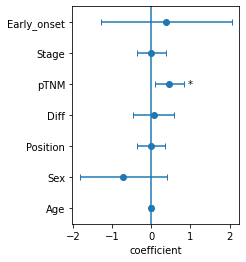

In [8]:
df=df1
df = df.drop(['Intercept'])
#df = df.sort_values('pvalues',ascending=False)
plt.figure(figsize=(3,4))
ax = plt.subplot2grid((1, 1), (0, 0))
ax.errorbar(df["coeff"], range(len(df.index)),
    yerr=0,
    xerr=[list(df["coeff"] - df["lower 0.95"]), list(df["upper 0.95"] - df["coeff"])],
    fmt='o', capsize=3, color='tab:blue')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df["Name"])
ax.set_xlabel("coefficient")
ax.axvline(x=0, color='tab:blue')
#ax.set_xlim([0, 5.5])
ax.set_ylim([-0.5, len(df.index) - 0.5])
for i in range(len(df.index)):
    ax.text(df["upper 0.95"][i] + 0.1,i, df['codes'][i], verticalalignment='center')
#ax.set_title("GSE122401")
pdf = getPDF("MV.pdf")
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [24]:
import bone
#reload(bone)
df=df1
df = df.drop(['Intercept'])
#df = df.sort_values('pvalues',ascending=False)
plt.figure(figsize=(3,4))
ax = plt.subplot2grid((1, 1), (0, 0))
ax.errorbar(df["coeff"], range(len(df.index)),
    yerr=0,
    xerr=[list(df["coeff"] - df["lower 0.95"]), list(df["upper 0.95"] - df["coeff"])],
    fmt='o', capsize=3, color='tab:blue')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df["Name"])
ax.set_xlabel("coefficient")
ax.axvline(x=0, color='tab:blue')
#plt.xscale('symlog')
ax.set_xlim([-1000, 1000])
ax.set_ylim([-0.5, len(df.index) - 0.5])
for i in range(len(df.index)):
    ax.text(df["upper 0.95"][i] + 0.1,i, df['codes'][i], verticalalignment='center')
#ax.set_title("GSE122401")
pdf = getPDF("MV.pdf")
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

NameError: name 'plt' is not defined